# 판다스 더 알아보기

In [5]:
import pandas as pd
# original shape (10886,12)
df = pd.read_csv("train.csv", skiprows = None)
print(df.shape)
df.head()
# shift + tab 누르면 공식문서 (도움말) 확인 가능 (인터넷 연결 없어도)
# help(pd.read_csv) 이것도 도움말

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### agg - aggregate
    * 그룹합산

In [20]:
import numpy as np
np.unique(df['season'])

array([1, 2, 3, 4], dtype=int64)

In [24]:
reg_mean = {"registered" : np.mean}
cas_mean = {"casual" : np.mean}
reg = df.groupby('season').agg(reg_mean).reset_index()
cas = df.groupby('season').agg(cas_mean).reset_index()
# reset_index() 사용시 기존의 인덱스가 컬럼으로 

In [28]:
reg

,season,registered
0,1,100.853686
1,2,167.804610
2,3,182.196853
3,4,170.407462


In [ ]:
cas

In [29]:
pd.merge(cas,reg)

,season,casual,registered
0,1,15.489576,100.853686
1,2,47.446762,167.804610
2,3,52.220271,182.196853
3,4,28.580834,170.407462


In [31]:
pd.merge(cas, reg[::2], how = "left")

,season,casual,registered
0,1,15.489576,100.853686
1,2,47.446762,NaN
2,3,52.220271,182.196853
3,4,28.580834,NaN


In [32]:
pd.merge(cas, reg[::2], how = "right")

,season,casual,registered
0,1,15.489576,100.853686
1,3,52.220271,182.196853


In [33]:
pd.merge(cas, reg[::2], how = "inner")
# 겹치는게 season이라 season 기준으로 교집합 찾는 거임

,season,casual,registered
0,1,15.489576,100.853686
1,3,52.220271,182.196853


In [34]:
pd.merge(cas, reg[::2], how = "outer")
# 겹치는게 season이라 season 기준으로 합집합 

,season,casual,registered
0,1,15.489576,100.853686
1,2,47.446762,NaN
2,3,52.220271,182.196853
3,4,28.580834,NaN


#### datetime processing
    날짜를 다루는 방법

In [ ]:
df['datetime'][0]

In [ ]:
sample = '2011-01-01 00:00:00'
ymd = sample.split(" ")[0]
hms = sample.split(" ")[1]
year = int(ymd.split("-")[0])
month = int(ymd.split("-")[1])
day = int(ymd.split("-")[2])
hour = int(hms.split(":")[0])
minute = int(hms.split(":")[1])
second = int(hms.split(":")[2])
print(year, month, day, hour, minute, second)

In [58]:
datetime = pd.to_datetime(sample)
# 요일 정보를 찾을 때 datetime 함수 편함 
datetime.dayofweek
# 월요일부터 0

5

In [15]:
# apply()안에는 함수가 들어가면 됨 lambda아니어도 됨!
datetimer = df['datetime'].apply(pd.to_datetime)
df['year'] = datetimer.apply(lambda x : x.year)
df['month'] = datetimer.apply(lambda x : x.month)
df['day'] = datetimer.apply(lambda x : x.day)
df["hour"] = datetimer.apply(lambda x : x.hour)
df['dayofweek'] = datetimer.apply(lambda x : x.dayofweek)
df['year_month'] = df['year'].apply(str) + "-" + df['month'].apply(str)
interested = ["datetime", "year", "month", "day", "hour", "dayofweek", "year_month"]
df[interested].head()

,datetime,year,month,day,hour,dayofweek,year_month
0,2011-01-01 00:00:00,2011,1,1,0,5,2011-1
1,2011-01-01 01:00:00,2011,1,1,1,5,2011-1
2,2011-01-01 02:00:00,2011,1,1,2,5,2011-1
3,2011-01-01 03:00:00,2011,1,1,3,5,2011-1
4,2011-01-01 04:00:00,2011,1,1,4,5,2011-1


#### 그래프 그리는 여러가지 방법
    * pandas, matplotib, seaborn

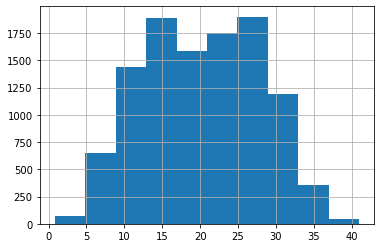

In [65]:
df['temp'].hist()

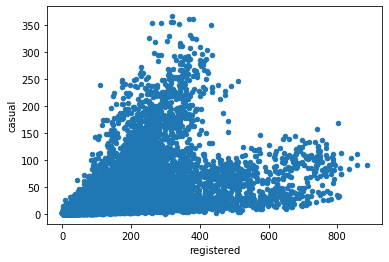

In [66]:
df.plot.scatter(x="registered", y="casual")

<BarContainer object of 10886 artists>

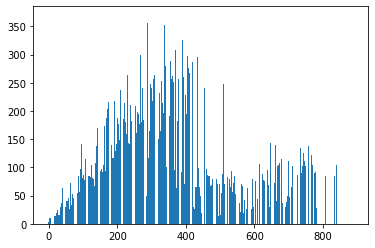

In [12]:
import matplotlib.pyplot as plt
# 보고서안에 그래프를 같이 넣겠다는 의미
%matplotlib inline 
plt.bar(data = df, x="registered", height="casual")

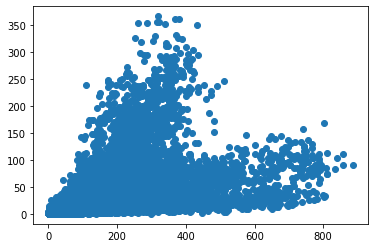

In [11]:
plt.scatter(data=df, x="registered", y="casual")

In [3]:
import seaborn as sns
# seaborn 도구를 불러와 sns라는 축약어로 사용하겠다

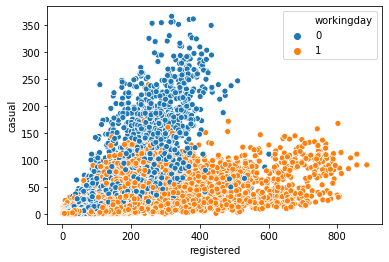

In [21]:
sns.scatterplot(data=df, x="registered", y="casual", hue = "workingday")

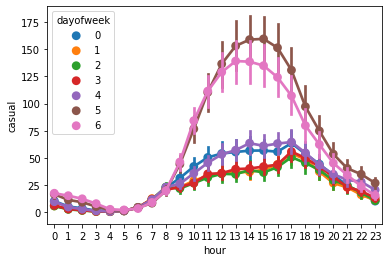

In [28]:
sns.pointplot(data=df, x="hour", y="casual", hue="dayofweek")

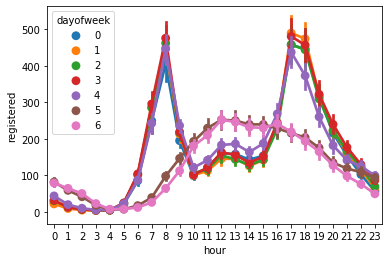

In [29]:
sns.pointplot(data=df, x="hour", y="registered", hue="dayofweek")

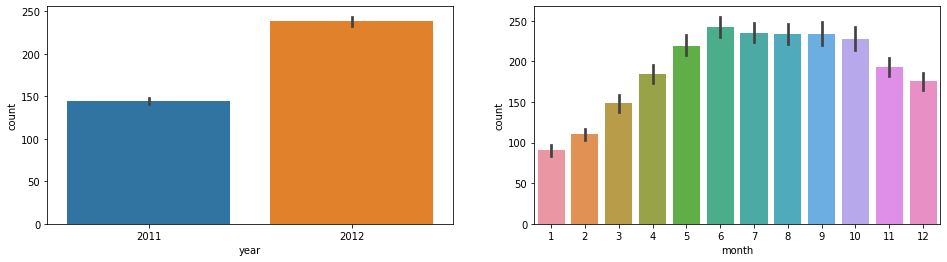

In [41]:
# 한 화면에 여러개의 그래프를 표현하는 방법
# fig는 figure로 써도됨, 그래프를 그릴 컨버스를 뜻함
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,4)
sns.barplot(data=df, x="year", y="count", ax=ax1)
sns.barplot(data=df, x="month", y="count", ax=ax2)

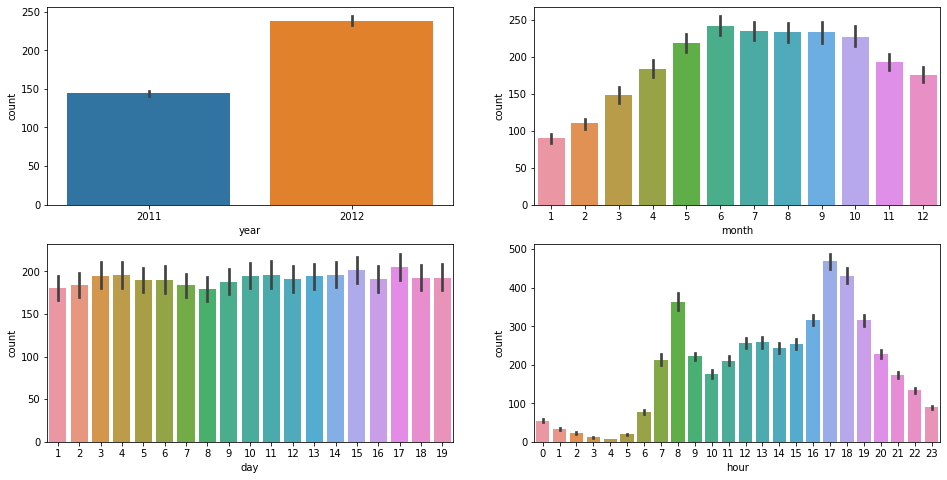

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,8)
sns.barplot(data=df, x="year", y="count", ax=ax1)
sns.barplot(data=df, x="month", y="count", ax=ax2)
sns.barplot(data=df, x="day", y="count", ax=ax3)
sns.barplot(data=df, x="hour", y="count", ax=ax4)

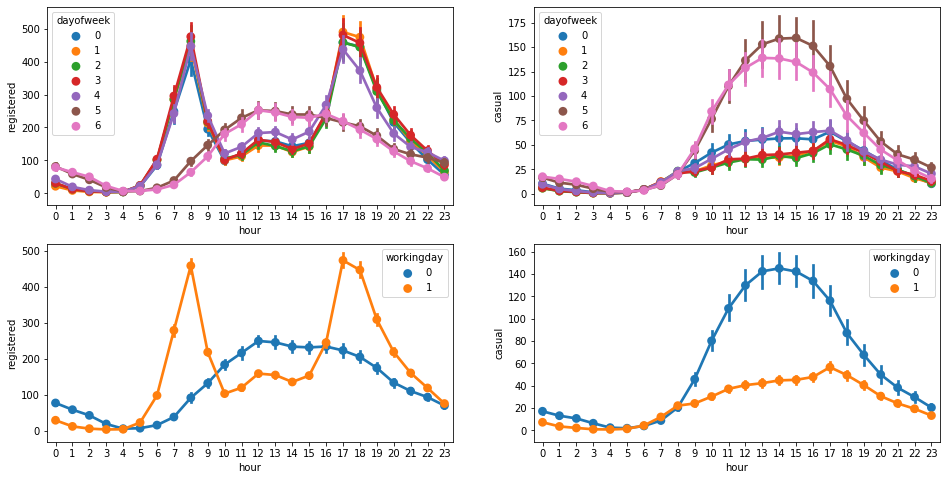

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,8)
sns.pointplot(data=df, x="hour", y="registered",hue="dayofweek", ax=ax1)
sns.pointplot(data=df, x="hour", y="casual",hue="dayofweek", ax=ax2)
sns.pointplot(data=df, x="hour", y="registered",hue="workingday", ax=ax3)
sns.pointplot(data=df, x="hour", y="casual",hue="workingday", ax=ax4)

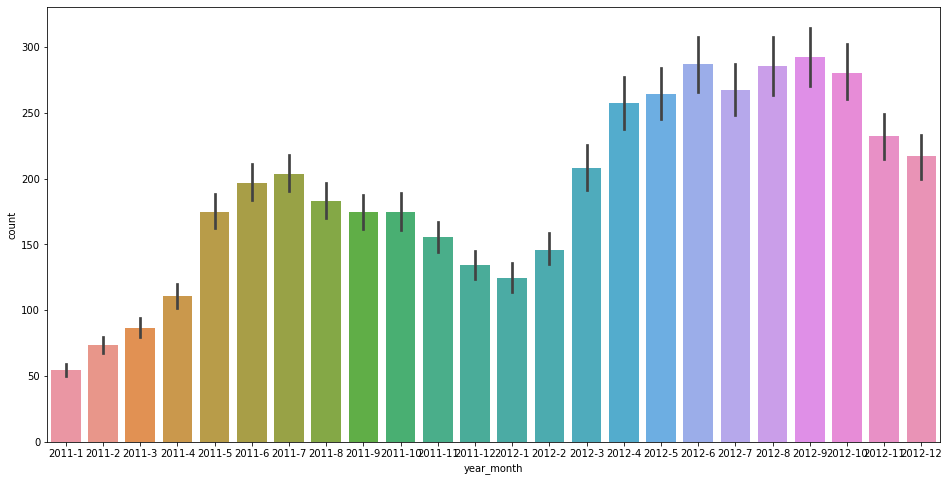

In [52]:
figure, ax1 = plt.subplots()
figure.set_size_inches(16,8)
sns.barplot(data=df, x="year_month", y="count")